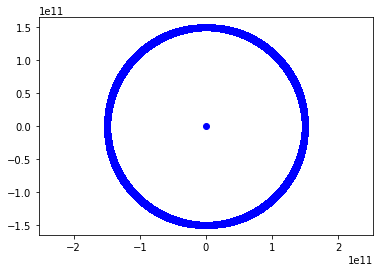

In [27]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def calc_acceleration(force, mass):
    if mass <= 0:
        raise TypeError('Mass has to be greater than 0')
    return (1/mass)*force

def next_location(mass, position, speed, acceleration, delta_t):
    return (position + delta_t * speed + (delta_t**2/2)*acceleration)

def calc_gravitational_force(mass1, mass2, pos1, pos2):
    delta_pos = np.linalg.norm(pos2-pos1)
    return (6.673*10**-11)*(((mass1*mass2)/delta_pos**3)*(pos2-pos1))

def calc_mass_focus(ignore, masses, positions):
    total_mass = np.sum(masses)
    
    tmp_loc = np.zeros(3, dtype=np.float64)
    
    for i in range(masses.size):
        if i == ignore:
            continue
        tmp_loc = tmp_loc + (masses[i] * positions[i])    
    return (1/(total_mass - masses[i]))*tmp_loc



body_amount = 2
positions = np.zeros((body_amount, 3), dtype=np.float64)
speed = np.zeros((body_amount, 3), dtype=np.float64)
radius = np.zeros((body_amount), dtype=np.float64)
mass = np.zeros((body_amount), dtype=np.float64)

positions[0] = np.array([0,0,0])
speed[0] = [0,0,0]
mass[0] = 1.989*10**30

positions[1] = np.array([1.496*10**11, 0, 0])
speed[1] = np.array([0, 29780, 0])
mass[1] = 5.972*10**24

x_vals = []
y_vals = []
timestep = 100
step_amount = 3154*10**2

for i in range(step_amount):
    mass_foc_pos = positions[0]
    mass_foc_weight = mass[0]
    grav_force = calc_gravitational_force(mass[body], mass_foc_weight, positions[body], mass_foc_pos)
    accel = calc_acceleration(grav_force, mass[body])
    speed[body] = speed[body] + accel*timestep
    positions[body] = next_location(mass[body], positions[body], speed[body], accel, timestep)
    x_vals.append(positions[body][0])
    y_vals.append(positions[body][1])

x_vals.append(positions[0][0]) # Fügt die Sonne hinzu
y_vals.append(positions[0][1])
plt.axis('equal')
plt.plot(x_vals, y_vals, 'ob')